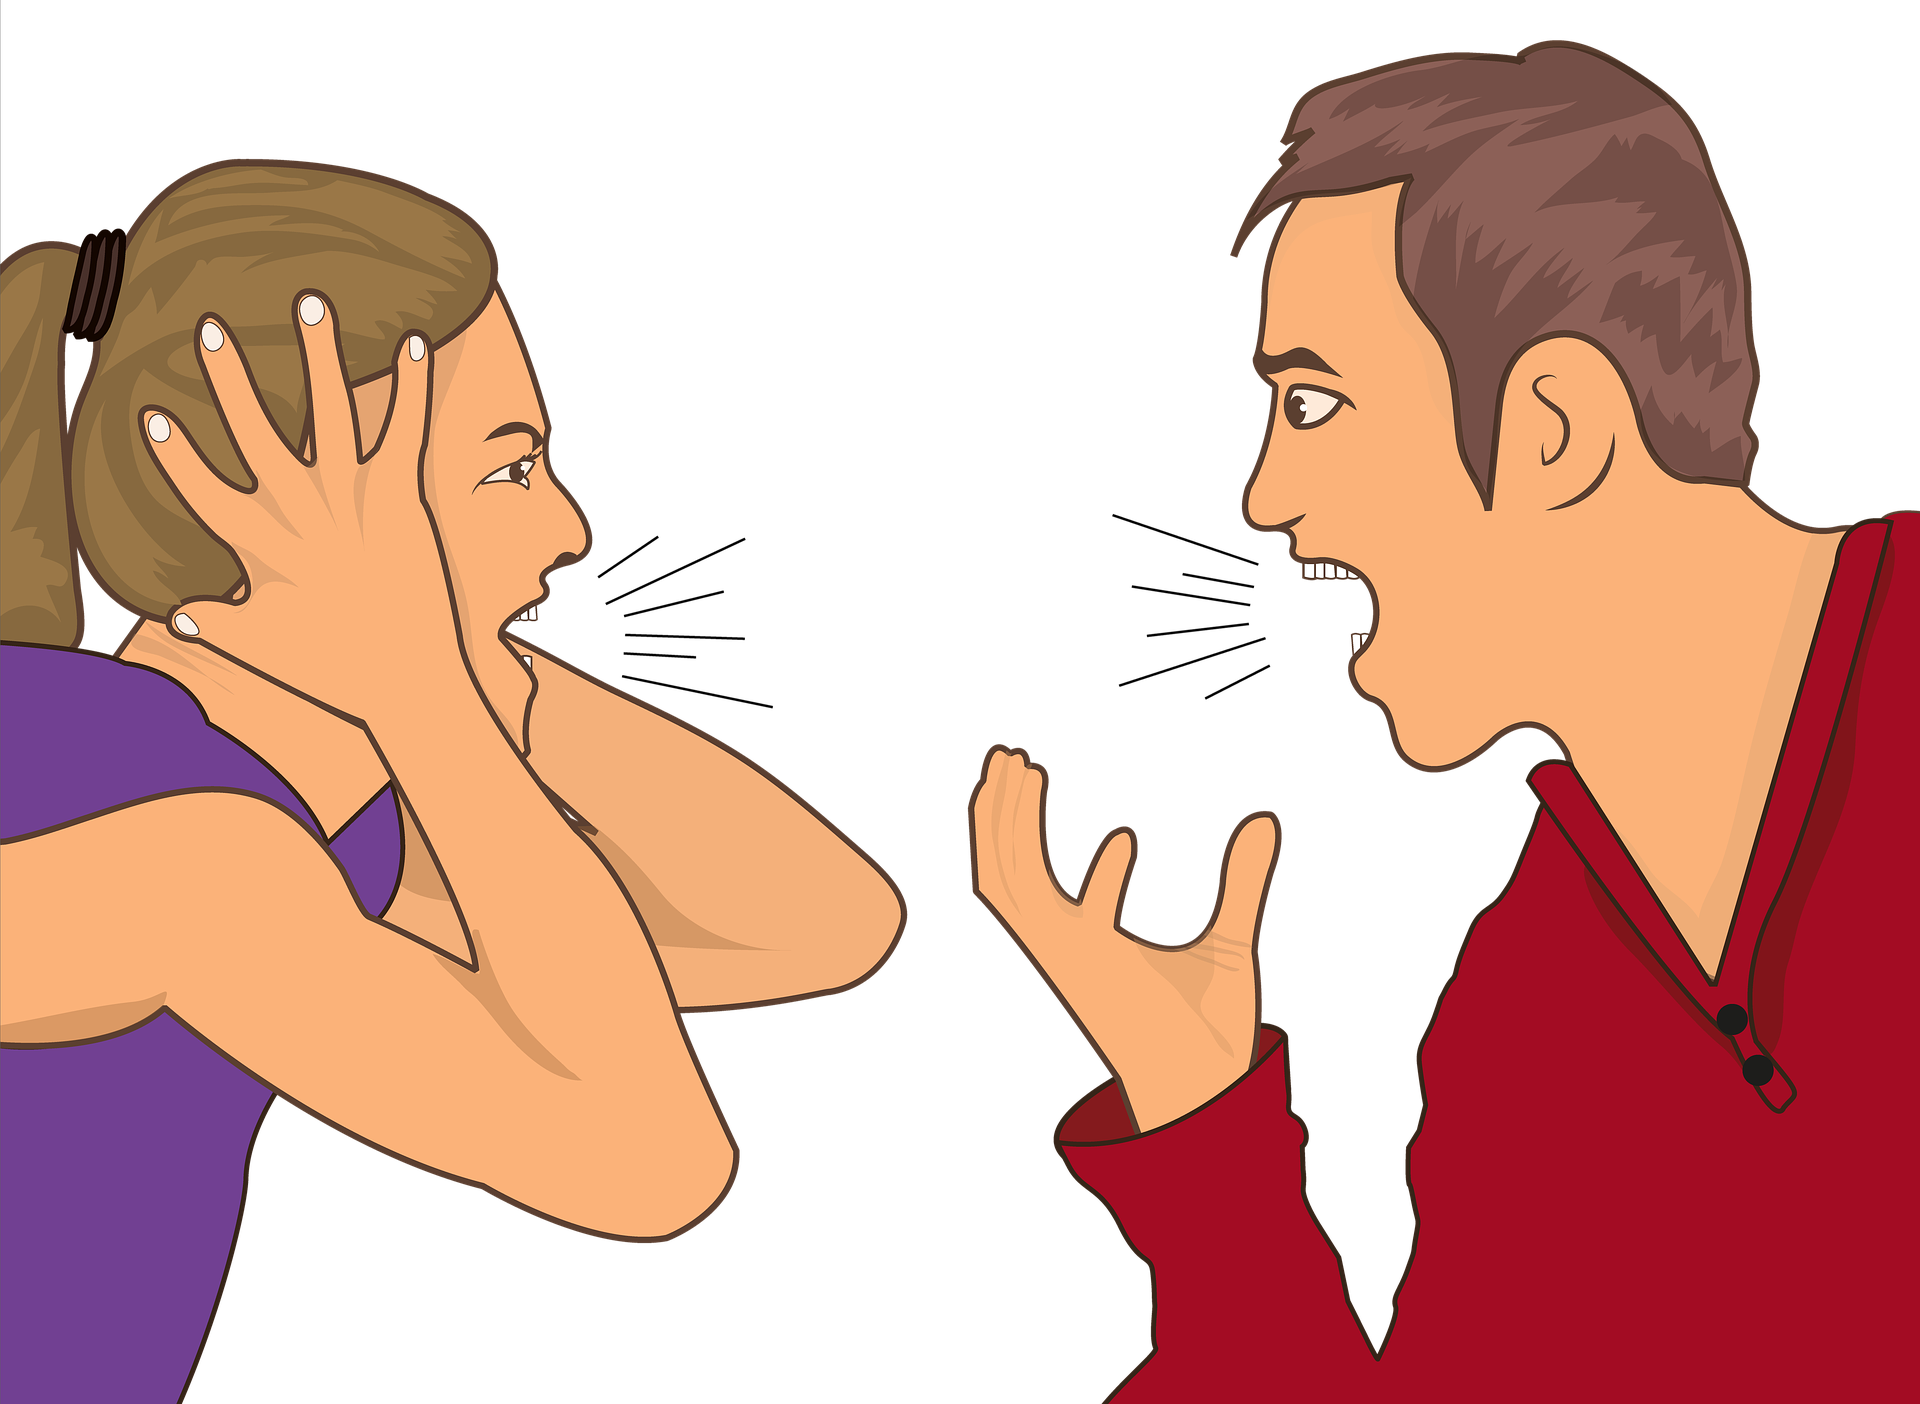

Depression in Married Couple is a major concern nowadays. This can be happen through many things like Unemployment, lack of spending time with eachother, workload and Many things.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pd.set_option('display.max_rows',20000, 'display.max_columns',100)
df = pd.read_csv("../input/depression-in-married-couples/Dataset 1.csv")
df.head()

In [ ]:
df.info()

In [ ]:
df['B_Total'] = df['B1']+df['B2']+df['B3']+df['B4']+df['B5']+df['B6']+df['B7']+df['B8']+df['B9']+df['B10']+df['B11']+df['B12']+df['B13']+df['B14']+df['B15']+df['B16']+df['B17']+df['B18']+df['B19']+df['B20']+df['B21']
df = df.drop(['B1','B2','B3','B4','B5','B6','B7','B8','B9','B10','B11','B12','B13','B14','B15','B16','B17','B18','B19','B20','B21'], axis = 1) 

In [ ]:
df['Gender'].value_counts()

## Total Gender from Online Form

In [ ]:
labels = ['Female','Male']
values = [282,151]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=labels, line=dict(color='#000000', width=.6)))
fig.update_layout(title_text='Total Gender from Online Form')
fig.show()


In [ ]:
df['Education'].value_counts()

## Depression of Married Couples in Istanbul with Education Qualification

In [ ]:

Education = ['Primary','High School','Bachelor','Msc or PhD', ]

fig = go.Figure([go.Bar(x=Education, y=[35,106,211,81])])
fig.update_traces(marker_color='rgb(225,8,50)', marker_line_color='rgb(58,48,255)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Depression of Married Couples in Istanbul with Education Qualification ')
fig.show()

## Genderwise Education Qualification 

In [ ]:
gender_eduqualification = df.groupby(['Gender'])['Education'].value_counts().reset_index(name='Count')
fig = px.bar(gender_eduqualification, x="Gender", y='Count',color='Education', title="Gendervise Education Qualification : 1-Female, 2-Male")
fig.show()

## People Employed and their Qualification

In [ ]:
People_WorkingorNot = df.groupby(['Working Status'])['Education'].value_counts().reset_index(name='WorkingorNot')
WorkingQ = People_WorkingorNot[People_WorkingorNot['Working Status']==1]

Education = ['Bachelor','High School','Primary','Msc or PhD']
fig = go.Figure([go.Bar(x=Education, y=WorkingQ['WorkingorNot'])])
fig.update_traces(marker_color='rgb(8,225,50)', marker_line_color='rgb(58,48,255)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='People Employed and their Qualification')
fig.show()

## People Unemployed and their Qualification

In [ ]:
People_WorkingorNot = df.groupby(['Working Status'])['Education'].value_counts().reset_index(name='WorkingorNot')
WorkingNQ = People_WorkingorNot[People_WorkingorNot['Working Status']==2]

Education = ['Bachelor','Msc or PhD','Primary','High School']
fig = go.Figure([go.Bar(x=Education, y=WorkingQ['WorkingorNot'])])
fig.update_traces(marker_color='rgb(8,50,255)', marker_line_color='rgb(255,48,58)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='People Unemployed and their Qualification')
fig.show()

## People Having Child and Not Having with their Education

In [ ]:
Educatedpeoplechildstatus = df.groupby(['Status of Having a Child'])['Education'].value_counts().reset_index(name='Total Child Count')

YesforChild = Educatedpeoplechildstatus[Educatedpeoplechildstatus['Status of Having a Child']==1]
NoforChild = Educatedpeoplechildstatus[Educatedpeoplechildstatus['Status of Having a Child']==2]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=YesforChild['Education'],
    y=YesforChild['Total Child Count'],
    name='People have a child',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=NoforChild['Education'],
    y=NoforChild['Total Child Count'],
    name='People do not have a child',
    marker_color='lightsalmon'
))


fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.update_layout(title_text='Education of People: 1-Primary, 2-High School, 3-Bachloer, 4-MSc or PhD')
fig.show()


In [ ]:
Educatedpeoplechildstatus = df.groupby(['Status of Having a Child'])['Education'].value_counts().reset_index(name='Total Marriage Count')


## People With Flirt/Arrange Marriage and their Education

In [ ]:
PeopleMarriageStatus = df.groupby(['Marriage Style'])['Education'].value_counts().reset_index(name='Total Marriage Count')

ArrangeMarriage = PeopleMarriageStatus[PeopleMarriageStatus['Marriage Style']==1]
FlirtMarriage = PeopleMarriageStatus[PeopleMarriageStatus['Marriage Style']==2]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=ArrangeMarriage['Education'],
    y=ArrangeMarriage['Total Marriage Count'],
    name='People with Arrange Marriage',
    marker_color='Orange'
))
fig.add_trace(go.Bar(
    x=FlirtMarriage['Education'],
    y=FlirtMarriage['Total Marriage Count'],
    name='People with Flirt Marriage',
    marker_color='Dark Orange'
))


fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.update_layout(title_text='Education of People: 1-Primary, 2-High School, 3-Bachloer, 4-MSc or PhD')
fig.show()


In [ ]:
Female_Marriage = df[df['Gender']==1]
Female_Marriage.head()

In [ ]:
Female_Marriage = df[df['Gender']==1]
Female_Marriage['Marriage Style'].value_counts()

In [ ]:
Male_Marriage = df[df['Gender']==2]
Male_Marriage['Marriage Style'].value_counts()

## Genderwise Flirt Marriage or Arrange Marriage

In [ ]:
labels = ['Flirt Marriage','Arrange Marriage']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[214,68], name="Female Marriage"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[100,51], name="Male Marriage"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Genderwise Flirt Marriage or Arrange Marriage",
    annotations=[dict(text='Female', x=0.17, y=0.5, font_size=15, showarrow=False),
                 dict(text='Male', x=0.81, y=0.5, font_size=15, showarrow=False)])
fig.show()

## Genderwise working n having Child

In [ ]:
Peoplethathavechild = df.groupby(['Gender','Working Status'])['Status of Having a Child'].sum().reset_index(name='Have a Child')
fig = px.bar(Peoplethathavechild, x="Gender", y="Have a Child", color="Working Status", barmode="group")
fig.update_layout(
    title_text="Genderwise working n having Child: (Gender 1-Female, 2-Male) , (Working Status: 1-Employed, 2-Unemployed)")
fig.show()

In [ ]:
PeopleSuffereing = df.groupby(['Gender','Working Status','Marriage Style'])['B_Total'].sum().reset_index(name='Total Score')


In [ ]:
Gender_Take = []
for i in PeopleSuffereing['Gender']:
    if i == 1:
        Gender_Take.append('Female')
    else:
        Gender_Take.append('Male')  
PeopleSuffereing['Gender_Take']=Gender_Take


In [ ]:
Working_Status_Take = []
for i in PeopleSuffereing['Working Status']:
    if i == 1:
        Working_Status_Take.append('Employed')
    else:
        Working_Status_Take.append('Unemployed')  
PeopleSuffereing['Working_Status_Take']=Working_Status_Take

In [ ]:
Marriage_Style_Take = []
for i in PeopleSuffereing['Marriage Style']:
    if i == 1:
        Marriage_Style_Take.append('Arranged Marriage')
    else:
        Marriage_Style_Take.append('Flirt Marriage')  
PeopleSuffereing['Marriage_Style_Take']=Marriage_Style_Take

## Total Score of Scale with Affected Couple from Depression

In [ ]:
fig = px.sunburst(PeopleSuffereing, path=['Gender_Take', 'Working_Status_Take','Marriage_Style_Take'], values='Total Score')
fig.update_layout(
    title_text="Total Score of Scale with Affected Couple from Depression")
fig.show()

## VOTE IF You Liked IT